In [1]:
from IPython.core.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [2]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Titanic - Machine Learning from disaster 
### Kaggle contest

## This is a solution for the famous Kaggle contest about predicting survivors of Titanic

https://www.kaggle.com/c/titanic/data?select=train.csv

### Load packages and overview data

In [4]:
#!pip install sdv
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

- #### Training dataset consists of 12 attributes and 891 rows/passengers.

In [5]:
data_train = pd.read_csv('train.csv')
data_train.shape

(891, 12)

In [6]:
data_train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


- #### Attributes  can be identified as Numeric and Object datatypes. 

In [7]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- #### Numeric data statistic summary

In [8]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- #### Categorical data statistic summary

In [9]:
data_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- #### 38,3% of the passengers survived.


In [10]:
data_train.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

- #### 64,7% of the passengers were male.

In [11]:
data_train.Sex.value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

- #### Checking for missing values in training dataset

In [12]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Visualisation

- Survived passengers

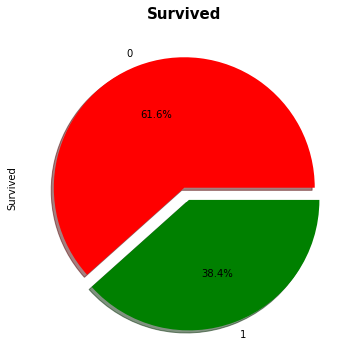

In [13]:
plt.figure(figsize=(14, 6))
cols = ['red','green']
data_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Survived',fontweight="bold", size=15)
plt.show()

- Gender 

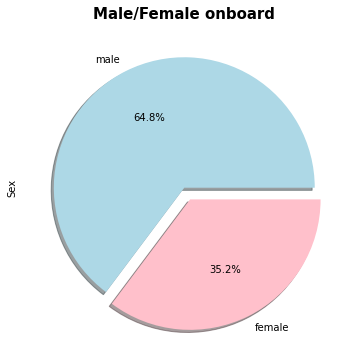

In [14]:
plt.figure(figsize=(14, 6))
cols = ['lightblue', 'pink']
data_train['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Male/Female onboard',fontweight="bold", size=15)
plt.show()

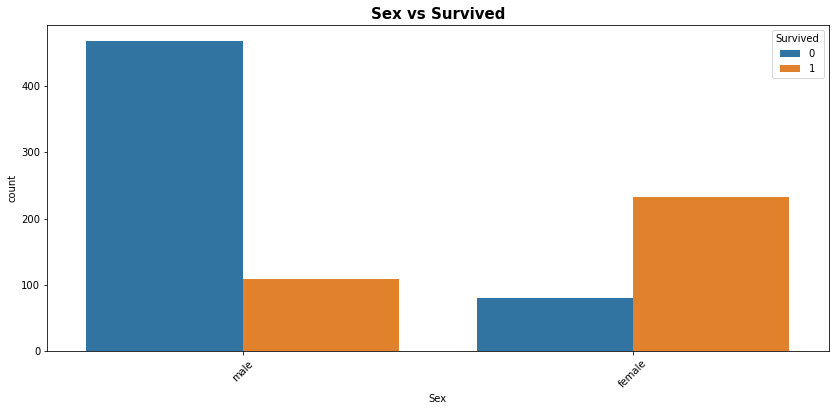

In [15]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Sex', data=data_train, palette='tab10', hue='Survived')
plt.xticks(rotation=45)
plt.title('Sex vs Survived',fontweight="bold", size=15)
plt.show()

- Age

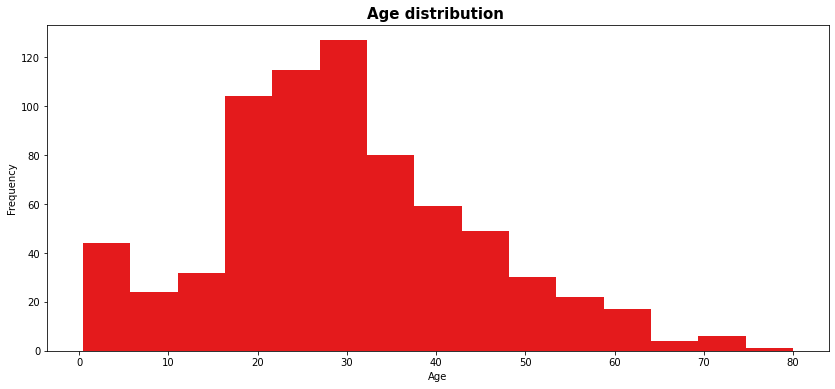

In [16]:
plt.figure(figsize=(14, 6))
data_train.Age.plot.hist(bins=15,cmap='Set1')
plt.title("Age distribution ",fontweight="bold", size=15)
plt.xlabel("Age")
plt.show()


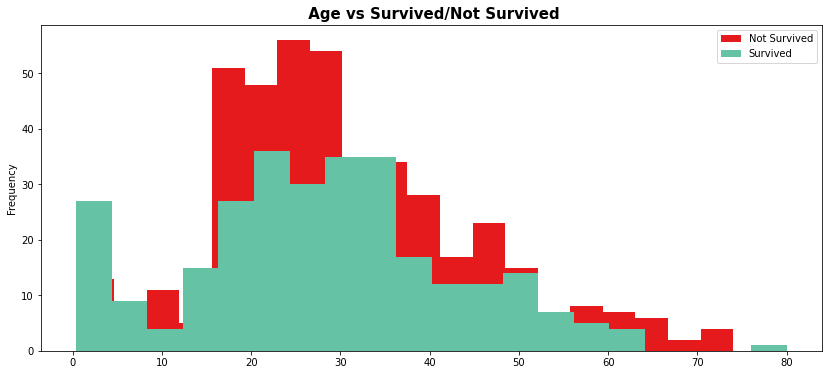

In [17]:
plt.figure(figsize=(14,6))
plt.title(" Age vs Survived/Not Survived",fontweight="bold", size=15)
data_train[data_train['Survived']==0].Age.plot.hist(bins=20,cmap='Set1', label = 'Not Survived')
data_train[data_train['Survived']==1].Age.plot.hist(bins=20,cmap='Set2', label = 'Survived')
plt.legend()
plt.show()

- Pclass

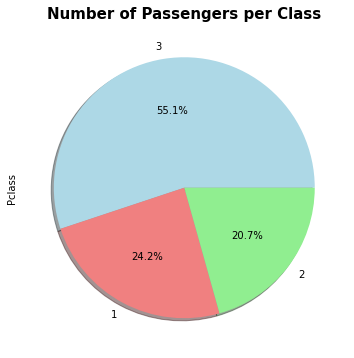

In [18]:
plt.figure(figsize=(14, 6))
cols = ['lightblue', 'lightcoral', 'lightgreen']
data_train['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Number of Passengers per Class',fontweight="bold", size=15)
plt.show()

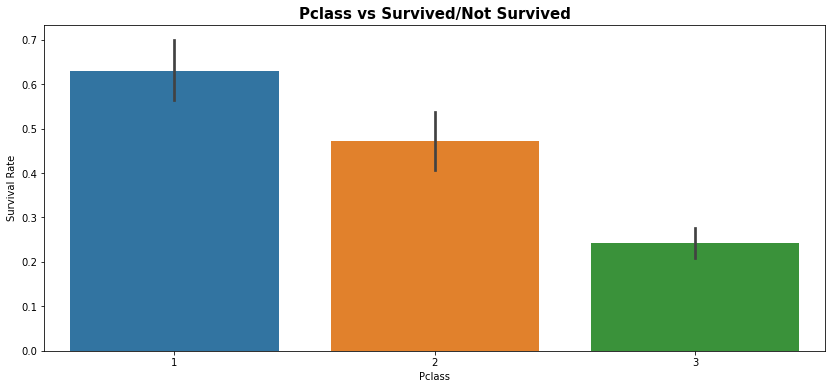

In [19]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Pclass', y='Survived', data=data_train, palette='tab10')
plt.title('Pclass vs Survived/Not Survived',fontweight="bold", size=15)
plt.ylabel("Survival Rate")
plt.show()

We skip the rest of the attributes for brevity.

- Correlation Matrix

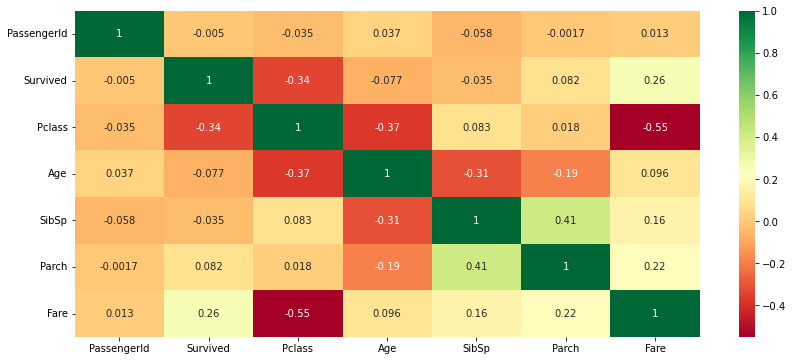

In [20]:
plt.figure(figsize=(14,6))
sns.heatmap(data_train.corr(),annot=True,cmap='RdYlGn')
plt.show()

### Data Pre-processing

A common pre-processing step is to extract the **Title** from the **Name** attribute in order to impute missing age values, by using the median of each group.

In [21]:
data_train['Title'] = data_train['Name'].str.extract('([A-Za-z]+)\.', expand=True)
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_train.replace({'Title': mapping}, inplace=True)
print(data_train['Title'].value_counts())

Mr        525
Miss      185
Mrs       128
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64


We can visualize the survival count for each Title group

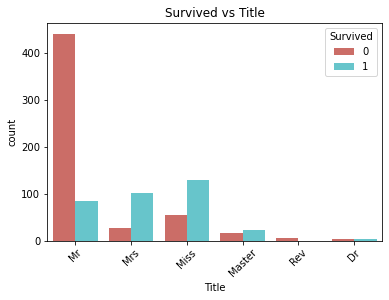

In [22]:
sns.countplot(x='Title', data=data_train, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.title('Survived vs Title')
plt.show()

In [23]:
title_ages = dict(data_train.groupby('Title')['Age'].median())
data_train['age_med'] = data_train['Title'].apply(lambda x: title_ages[x])
data_train['Age'].fillna(data_train['age_med'], inplace=True)
del data_train['age_med']

We fill the missing values of the **Embarked** attribute by using the *ffill* method of pandas package

In [24]:
data_train.Embarked.fillna(method="ffill", inplace=True)

We inspect again the attributes with missing values. As **Cabin** is the only one with missing values, we can exclude it from the rest of our analysis

In [25]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

We choose to combine attributes **Parch** and **SibSp** to a single attribute **Family**. Also, we drop PassengerId, Name, Cabin ,Ticket, Embarked and Title attributes, after testing many models, which are omitted for the sake of brevity. We thus create a new dataset called **df_train**, which consists of 891 rows and 6 columns.

In [26]:
data_train['Family'] = data_train['Parch'] + data_train['SibSp']
data_train.Fare = data_train.Fare.round(2)
df_train = data_train.drop(columns = ['PassengerId','Name','Cabin','Ticket',                                      'Parch','SibSp','Embarked','Title'])
df_train["Sex"].replace({"male": 1, "female": 0}, inplace=True)
df_train.shape

(891, 6)

In [27]:
df_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,1,22.0,7.25,1
1,1,1,0,38.0,71.28,1
2,1,3,0,26.0,7.92,0
3,1,1,0,35.0,53.10,1
4,0,3,1,35.0,8.05,0
5,0,3,1,30.0,8.46,0
6,0,1,1,54.0,51.86,0
7,0,3,1,2.0,21.08,4
8,1,3,0,27.0,11.13,2
9,1,2,0,14.0,30.07,1


- Correlation Matrix

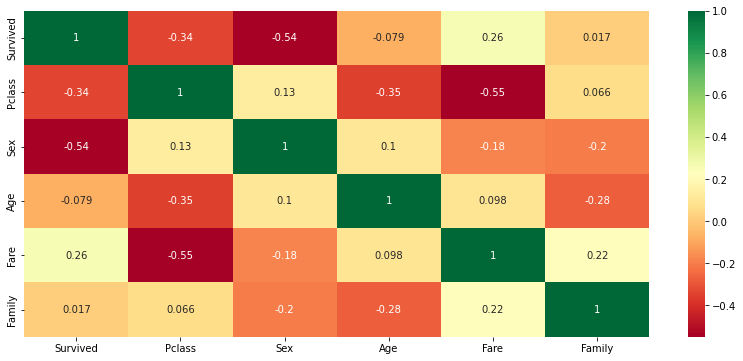

In [28]:
plt.figure(figsize=(14,6))
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn')
plt.show()

### Random Forest

#### We split the training dataset into 3 sets (train, eval, test) for later use.

In [29]:
X = df_train.iloc[:,1:]
y = df_train.Survived

X_train, X_eval_test, y_train, y_eval_test = train_test_split(
    X, y, test_size=0.2, random_state=7)

X_eval, X_test, y_eval, y_test = train_test_split(
    X_eval_test, y_eval_test, test_size=0.5, random_state=7)

print(X_train.shape)
print(X_eval.shape)
print(X_test.shape)

(712, 5)
(89, 5)
(90, 5)


#### After many trials, we choose *Random Forest* as our main model, and we apply grid search for hyperparameter tuning in order to determine the optimal settings. 

- We choose number of estimators, maximum depth and bootstrap as our hyper-parameters for tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [10, 100, 200, 500]
max_depth = [None, 3, 5, 7, 10]
bootstrap = ['True', 'False']

param_grid = dict(n_estimators=n_estimators, 
                  max_depth=max_depth,
                  bootstrap = bootstrap,
                 )


# create the default model
clf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=clf, 
                    param_grid=param_grid,
                    cv=5,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


- The best model is the following. We can narrow the area of search and continue with hyperparameter tuning.

In [ ]:
grid.best_estimator_

- The above model has accuracy score **85.39%**

- We use the optimal settings to train the classifier and evaluate on the eval set.

In [ ]:
clf = RandomForestClassifier(bootstrap='True', max_depth=7, n_estimators=500,
                       random_state=42)
clf.fit(X_train,y_train)
clf.score(X_eval,y_eval)

- We apply one more time **Grid Search** for better results. 

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [400,500,600,700]
max_depth = [6, 7, 8, 9]

param_grid = dict(n_estimators=n_estimators, 
                  max_depth=max_depth,
                  bootstrap = bootstrap,
                 )


# create the default model
clf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=clf, 
                    param_grid=param_grid,
                    cv=5,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

As we can see the optimal model remains the same.

- We evaluate on the test set. We achieve **81,11%** accuracy.

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

### Test data preprocessing and evaluation

#### We import the test dataset for the competition. We apply the same pre-processing steps and predict the outcomes by using the model we have trained.

In [ ]:
data_test = pd.read_csv('test.csv')

In [ ]:
data_test.head()

In [ ]:
data_test['Title'] = data_test['Name'].str.extract('([A-Za-z]+)\.', expand=True)
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_test.replace({'Title': mapping}, inplace=True)
data_test['Title'].value_counts()
data_test['Family'] = data_test['Parch'] + data_test['SibSp']
title_ages = dict(data_test.groupby('Title')['Age'].median())
data_test['age_med'] = data_test['Title'].apply(lambda x: title_ages[x])
data_test['Age'].fillna(data_test['age_med'], inplace=True)
del data_test['age_med']
df_test= data_test.drop(columns = ['PassengerId','Name','Cabin','Ticket',
                                 'Parch','SibSp','Embarked','Title'])
df_test["Sex"].replace({"male": 1, "female": 0}, inplace=True)
df_test.Fare.fillna(method="ffill", inplace=True)

In [ ]:
X = df_test
predictions = clf.predict(X)
df_pred = pd.DataFrame(zip(data_test.PassengerId,predictions),columns = ['PassengerId','Survived'])
df_pred.set_index("PassengerId",inplace=True)
df_pred.head(5)

- We save the results into a .csv file and submit the file. Our score is **78.947%**, which ranks us to the top **8.3%** of the contest. 

In [ ]:
df_pred.to_csv('titanic_predictions.csv')